In [1]:
!pip install spectral-cube
!pip install pvextractor 
!pip install aplpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

     |████████████████████████████████| 218 kB 5.1 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 73 kB 743 kB/s 
     |████████████████████████████████| 89 kB 3.8 MB/s 
     |████████████████████████████████| 378 kB 38.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.8 MB/s 
     |████████████████████████████████| 1.3 MB 29.9 MB/s 
     |████████████████████████████████| 208 kB 37.6 MB/s 
  Created wheel for pyregion: filename=pyregion-2.1.1-cp37-cp37m-linux_x86_64.whl size=307714 sha256=2540eb4514e987bc9e943cfeae863838c8f823975991220a1e9ee2cf05757a9f
  Stored in directory: /root/.cache/pip/wheels/69/58/ff/abccf444e678e2ddc65fae5cd5b7502b13c784110fa8ab7a90
Successfully built pyregion


In [2]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields//Large-sample-outflows-in-CygX-and-ML-methods/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"

##########################################################################################################################

kryu_list = QTable.read(filepath + '/data/asu (1).fit') # original Kryukova survey 
proto = QTable.read(filepath + '/data/cygx_pilot_protostars(Kry).fit')
wu = QTable.read(filepath + '/data/WuTable.fit')
outflowsCloud = QTable.read(filepath + '/data/outflowsClouds_output.fit')
cygX_init_newfields = QTable.read(filepath+'/data/table_newfields_input.fit')
cygX_init_pilot_1_5kpcA =  QTable.read(filepath + '/data/cygX_pilot_1.5kpc_A_input.fit')
pilotL = QTable.read(filepath + '/data/cygxPilot_proto.fits')
cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})

outflows = QTable.read(filepath + '/data/outflowsCloudsJCMT_output.fit')
outflowsF = QTable.read(filepath + '/data/outflowsCloudsJCMT_F.fit')
proto_0 = QTable.read(filepath + '/data/cygx_class0.fits')
proto_1 = QTable.read(filepath + '/data/cygx_class1.fits')

# read coordinates tables 
of_newfields = QTable.read(filepath + '/data/table_newfields_input.fit')
of_cygrift = QTable.read(filepath + '/data/cygX_pilot_cygrift0.65kpc_outout.fit')
of_W75 = QTable.read(filepath + '/data/cygX_pilot_W75_outout.fit')
of_DR21 = QTable.read(filepath + '/data/cygX_pilot_DR21_outout.fit')

cygX0 = SpectralCube.read(filepath + '/data/cygx_cobig_small.fits')
cygX_pilot = SpectralCube.read(filepath +'/data/cygX_pilot_km.fits')
cygx21cm = SpectralCube.read(filepath + '/data/cygx.c21_reprj.fits')
co =  SpectralCube.read(filepath + '/data/co_spec_cropped.fits') #cube_cobig_km
cygx_mom0 = SpectralCube.read(filepath + '/data/cygx_mom0.fits')


Mounted at /content/gdrive


TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


In [ ]:
outflowsFr = outflowsF.to_pandas().round({'RAJ2000':3, 'DecJ2000':3,	'Vc':2,	'Distance':2,	'Mass':3,	'Momentum':3,	'Energy':3,	'Dynamical Time':3,	'Cloud_Mass':3,	'Cloud_Energy':3,	'Energy_(of/cloud+of)':3,	'L_mech':3,	'Cloud_grav_energy':3,	'Cloud_time_ff':3,	'Cloud_collapse_power':3,	'log_power_ratio':3,	'log_tDyn_tFF_ratio':3})
outflowsFr

,Seq,ID,RAJ2000,DecJ2000,Vc,Distance,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of),L_mech,Cloud_grav_energy,Cloud_time_ff,Cloud_collapse_power,log_power_ratio,log_tDyn_tFF_ratio
0,1,b'G79.886+2.552',306.127,42.072,6.60,0.65,0.381,1.984,1.510,8.988,9.153,5.683,0.210,0.014,0.099,1.578,0.000,2.430,-1.244
1,4,b'G79.962+2.556',306.196,42.137,5.50,0.65,0.011,0.102,0.097,2.509,3.616,1.515,0.060,0.003,0.015,2.510,0.000,2.800,-2.000
2,3,b'G80.149+2.710',306.154,42.376,6.00,0.65,0.191,0.634,0.229,5.672,43.681,3.538,0.061,0.003,2.244,0.722,0.003,0.113,-1.105
3,2,b'G80.158+2.727',306.144,42.394,6.00,0.65,0.229,0.899,0.509,5.063,27.060,4.307,0.106,0.008,0.861,0.918,0.001,1.030,-1.258
4,27,b'G80.815+0.661',308.918,41.709,-3.00,1.50,0.149,0.388,0.138,30.027,6.348,0.991,0.122,0.000,0.047,1.894,0.000,1.264,-0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,33,b'0',309.856,41.328,-1.38,1.50,11.935,27.879,6.831,19.776,1091.152,108.336,0.059,0.029,1400.140,0.144,8.021,-2.448,0.136
80,34,b'0',309.873,41.368,-1.12,1.50,0.980,2.654,1.037,21.621,468.391,42.646,0.024,0.004,257.999,0.221,0.968,-2.387,-0.009
81,36,b'0',309.880,41.364,-2.50,1.50,5.501,10.693,2.514,31.464,631.369,63.063,0.038,0.007,468.778,0.190,2.043,-2.490,0.219
82,32,b'0',309.882,41.337,-2.25,1.50,2.000,7.427,2.841,5.244,947.514,110.024,0.025,0.045,1055.777,0.155,5.636,-2.099,-0.471


In [ ]:
outflowsF

Seq,ID,RAJ2000,DecJ2000,Vc,Distance,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of),L_mech,Cloud_grav_energy,Cloud_time_ff,Cloud_collapse_power,log_power_ratio,log_tDyn_tFF_ratio
,,deg,deg,km / s,kpc,solMass,km solMass / s,1e+44 erg,10 kyr,solMass,1e+44 erg,,solLum,1e+44 erg,Myr,solLum,,
int64,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.127,42.072,6.6,0.65,0.381,1.984,1.51,8.988,9.153,5.683,0.21,0.014,0.099,1.578,0.0,2.43,-1.244
4,G79.962+2.556,306.196,42.137,5.5,0.65,0.011,0.102,0.097,2.509,3.616,1.515,0.06,0.003,0.015,2.51,0.0,2.8,-2.0
3,G80.149+2.710,306.154,42.376,6.0,0.65,0.191,0.634,0.229,5.672,43.681,3.538,0.061,0.003,2.244,0.722,0.003,0.113,-1.105
2,G80.158+2.727,306.144,42.394,6.0,0.65,0.229,0.899,0.509,5.063,27.06,4.307,0.106,0.008,0.861,0.918,0.001,1.03,-1.258
27,G80.815+0.661,308.918,41.709,-3.0,1.5,0.149,0.388,0.138,30.027,6.348,0.991,0.122,0.0,0.047,1.894,0.0,1.264,-0.8
9,G80.832+0.570,309.034,41.671,11.5,1.3,2.45,5.72,1.547,9.076,675.362,59.38,0.025,0.014,536.381,0.184,2.418,-2.234,-0.306
26,G80.862+0.385,309.254,41.58,-1.4,1.5,6.073,28.013,14.868,11.708,467.772,70.128,0.175,0.105,257.317,0.221,0.965,-0.963,-0.275
31,G80.916+0.331,309.356,41.594,-1.3,1.5,0.721,2.421,1.006,15.61,62.184,9.209,0.098,0.005,4.547,0.605,0.006,-0.067,-0.589


In [ ]:
proto
flat_spectrum_max = 0.3
flat_spectrum_min = -0.3

In [ ]:
kryu_list_df = kryu_list.to_pandas()
kry_list_df_flat = kryu_list_df[(kryu_list_df.alpha < 0.3) & (kryu_list_df.alpha >= -0.3)].reset_index()

In [ ]:
kry_list_df_flat

,index,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Jmag,Hmag,Ksmag,__3_6_,__4_5_,__5_8_,__8_0_,__24_,alpha,RMEDSQ,logL,UKIDSS,_2MASS,Simbad
0,1,304.123958,39.442494,304.123958,39.442494,14.73,13.13,12.09,10.13,9.20,8.40,7.54,4.24,-0.13,1.141,0.827,2,1,b'Simbad'
1,12,304.372125,41.976400,304.372125,41.976400,14.78,13.19,12.13,10.73,9.92,9.25,8.49,4.12,0.27,10.810,0.637,1,1,b'Simbad'
2,13,304.417125,39.357794,304.417125,39.357794,14.26,12.49,11.24,9.54,8.77,8.06,7.37,3.59,-0.06,10.310,1.015,1,1,b'Simbad'
3,14,304.417375,39.343714,304.417375,39.343714,NaN,15.06,13.49,11.87,11.20,10.68,9.96,5.46,0.20,19.600,0.054,1,1,b'Simbad'
4,18,304.446500,39.338556,304.446500,39.338556,NaN,NaN,NaN,10.53,9.65,8.98,8.22,4.40,0.01,76.680,0.530,1,1,b'Simbad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1993,311.032500,42.717175,311.032500,42.717175,NaN,15.80,14.25,12.60,11.84,11.19,10.48,6.14,0.20,0.696,-0.200,1,1,b'Simbad'
507,1996,311.042875,43.170681,311.042875,43.170681,NaN,15.49,14.07,NaN,11.50,NaN,10.08,6.66,-0.23,0.166,-0.280,1,1,b'Simbad'
508,2000,311.056333,42.761886,311.056333,42.761886,NaN,NaN,13.97,11.70,10.69,9.89,9.10,5.82,-0.15,0.239,0.145,1,1,b'Simbad'
509,2001,311.060208,42.742700,311.060208,42.742700,NaN,NaN,NaN,13.08,11.99,11.08,10.19,7.13,-0.13,0.286,-0.370,1,0,b'Simbad'


In [ ]:
cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out

,Unnamed: 0,ID,RAJ2000,DecJ2000,Distance,Vc,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of)
0,0,0,304.495,41.938,1.50,-2.6,0.13,0.41,0.14,11.7,206.007000,32.998000,0.004225
1,1,0,304.506,41.926,1.50,-3.9,5.06,10.06,2.33,21.6,409.183000,50.672000,0.043925
2,2,0,304.602,42.033,1.50,-3.9,1.29,2.96,0.77,18.9,175.675000,16.922000,0.043685
3,84,0,305.121,41.414,1.30,10.4,0.42,0.80,0.16,20.3,22.047000,1.424000,0.103275
4,4,0,305.131,42.434,1.50,-1.8,0.23,0.60,0.18,31.5,18.900000,1.986000,0.083526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,G81.632+0.102,310.185,42.025,1.50,-6.8,1.85,3.95,0.95,20.4,290.150548,15.102715,0.059278
80,80,new?,310.639,42.463,1.30,8.1,0.03,0.24,0.25,2.4,26.902397,21.443082,0.011364
81,81,G82.189-0.042,310.813,42.374,0.65,7.2,0.18,0.55,0.24,8.5,3.525396,1.546235,0.136169
82,82,G82.581+0.203,310.867,42.833,1.30,11.1,2.43,15.60,12.50,4.5,98.995231,31.007027,0.287257


INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.833e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.357e+01 [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to  2.651e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.160e+01 [aplpy.core]
k-value= 0 

nan pixel
k-value= 1 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 2 

non nan pixel
k-value= 3 

non nan pixel
k-value= 4 

non nan pixel
k-value= 5 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 6 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 7 

nan pixel
k-value= 8 

non nan pixel
k-value= 9 

non nan pixel
k-value= 10 

non nan pixel
k-value= 11 

non nan pixel
k-value= 12 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 13 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 14 

nan pixel
k-value= 15 

non nan pixel
k-value= 16 

non nan pixel
k-value= 17 

non nan pixel
k-value= 18 

non nan pixel
k-value= 19 

non nan pixel
k-value= 20 

non nan pixel
k-value= 21 

nan pixel
k-value= 22 

non nan pixel
k-value= 23 

non nan pixel
k-value= 24 

non nan pixel
k-value= 25 

non nan pixel
k-value= 26 

non nan pixel
k-value= 27 

non nan pixel
k-value= 28 

nan pixel
k-value= 29 

non nan pixel
k-value= 30 

non nan pixel
k-value= 31 

non nan pixel
k-value= 32 

non nan pixel
k-value= 33 

non nan pixel
k-value= 34 

non nan pixel
k-value= 35 

nan pixel
k-value= 36 

non nan pixel
k-value= 37 

non nan pixel
k-value= 38 

non nan pixel
k-value= 39 

non nan pixel
k-value= 40 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 41 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 42 

nan pixel
k-value= 43 

non nan pixel
k-value= 44 

non nan pixel
k-value= 45 

non nan pixel
k-value= 46 

non nan pixel
k-value= 47 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 48 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


INFO: Auto-setting resolution to 245.53 dpi [aplpy.core]
INFO: Auto-setting resolution to 97.1026 dpi [aplpy.core]
0
co mean values: [        nan         nan  1.25773716  6.87276793  0.61674994         nan
         nan         nan  1.8567822   3.5519011   1.99477518  1.03546023
         nan         nan         nan  3.22558141  1.28278172  1.12447071
  0.41341394  0.65832579  0.20712158         nan  6.13979435  1.99986529
  0.52302212  2.73794746  1.4275856   1.65219831         nan  1.4632504
  5.88256645  9.21749115  5.50690699  2.58312559  0.66684657         nan
  3.95316958  8.8983593  17.98693275  2.55068898         nan         nan
         nan  1.2453469   1.43647063  7.58489227  4.22470856         nan
         nan] K km / s
21-cm mean values: [18.29869461 23.0622654  14.92785168 12.60480118 10.2796917   9.58103848
 10.98877811 22.61241913 29.54439735 19.64862633 15.06107044 12.33699703
  9.85798359  8.81494808 24.16682816 23.00341415 15.65573692 13.18206596
 12.46931267 11.3182582

,12CO(K km/s),21cm(K),proto_flat_number
38,17.986933,25.364428,57.0
22,6.139794,17.214018,39.0
14,NaN,24.166828,33.0
30,5.882566,21.594070,25.0
31,9.217491,21.756325,24.0
23,1.999865,18.295208,23.0
37,8.898359,18.824352,22.0
16,1.282782,15.655737,22.0
28,NaN,17.082020,21.0
21,NaN,19.031555,20.0


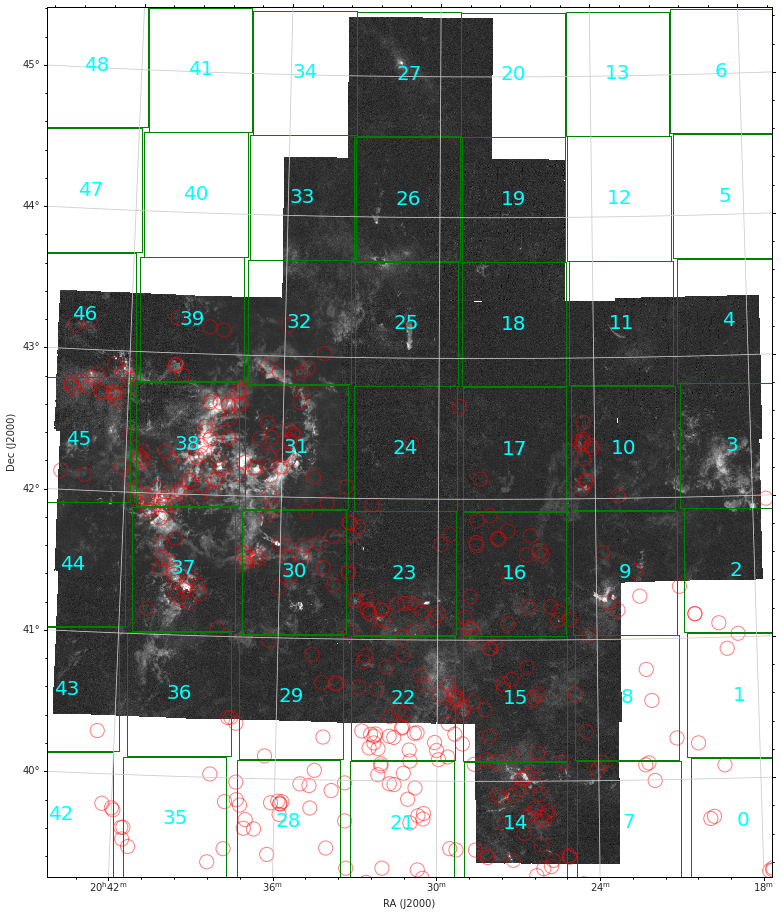

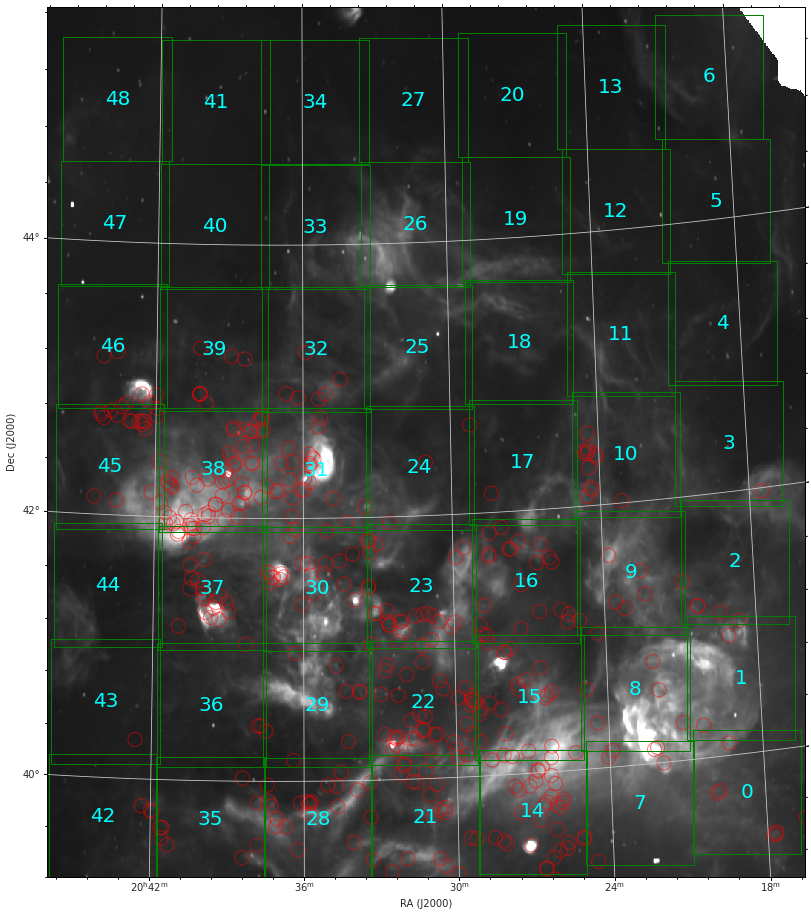

In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>> ML REGRESSION MODEL OF protostar number DENSITY ON MEAN CO and 21cm 
# >>> INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID <<<<<<
# >>>>>>>>>>>>>>>> TEST CODES <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
from astropy.nddata import Cutout2D
from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

proto_flat = kry_list_df_flat.round({'RAJ2000':3, 'DecJ2000':3})
N = 7
xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

co_mean = np.zeros(N**2) *u.K * u.km / u.s
c21_mean = np.zeros(N**2) * u.K
n_flat = np.zeros(N**2)

counter = 0
k = 0
w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0_21cm = cygx21cm.shape[1]/N

#co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

g = aplpy.FITSFigure(cygx21cm.hdu,figsize=(18, 16))
g.show_grayscale()

# >>>>>> this part for displaying proto_flat and sf regions >>>>>>>>>>>>>>>>>>
cdelt = utils.proj_plane_pixel_scales(co.wcs)
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> plot proto_flat >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
for z in range(0,len(proto_flat)):
        f.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
        g.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

for i in range(N):
    
    for j in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 

        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        #print(lon_range[0], lon_range[1], lat_range[0], lat_range[1])
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        x0_21cm, y0_21cm, _ = cygx21cm.wcs.wcs_world2pix(xw, yw, 0, 0)
        g.show_rectangles(x0_21cm, y0_21cm, w0_21cm, h0_21cm, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        g.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        # Create a sub_cube cutout with these coordinates
        position = (x0, y0)
        size = (w0, h0)     # pixels

        if i < 6:
          lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        elif i==6:
          lon_range = [xmin+i*1.005*dx, xmin+(i+1)*0.95*dx]

        print('k-value=',k,'\n')

        try:
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K
            #subcube_mom =(sub_cube_co.sum(axis=0)*dv)*u.K#.moment(order=0, axis=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< HERE HERE HERE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ||||||||||||||||||||||   IndexError happening here but WHY ????????????????
            #print('non nan pixel')
            #print(subcube_mom) # <<<<<<<< should not be all NaN for k=22
            co_mean[k] = np.nanmean(subcube_mom[~np.isnan(subcube_mom)])
        except IndexError:
             #print('nan pixel')
          
             co_mean[k] = np.nan
                
        # TASK2: this extracts pixels based on 21cm coordinates and slices segments from 21cm map  
        sub_cube_c21 = cygx21cm.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        c21_mean[k] = (sub_cube_c21.mean(axis=(1,2)))[0] * u.K 


        # TASK3: count proto_flat in these 25 coordinate segments >>> use a boolean statement if coordinates from output_jcmt list belongs to each segment, counter[k]=counter[k]+1 >> NOTE: does not count for OFs at .65 kpc
        for z in range(0,len(proto_flat)):
            s1 = (proto_flat.loc[z]['RAJ2000']*u.deg > xmin+(i*dx)) & (proto_flat.loc[z]['RAJ2000']*u.deg < xmin+((i+1)*dx))
            s2 = (proto_flat.loc[z]['DEJ2000']*u.deg > ymin+(j*dy)) & (proto_flat.loc[z]['DEJ2000']*u.deg < ymin+((j+1)*dy))
            #s3 = (outflows.loc[z]['Distance'] != 0.65)
            if (s1 and s2) == True: # and s3
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_flat[k] +=1
            else:
                pass
            

        k +=1
        #if k==23:
          #break


f.save('co_grids.pdf')
g.save('21cm_grids.pdf')    
print(counter)
print('co mean values:',co_mean)
print('21-cm mean values:',c21_mean)
print('outflow numbers in segments:', n_flat, '\n Total number of proto_flat=', n_flat.sum())

proto_co = pd.DataFrame({'12CO(K km/s)':co_mean, '21cm(K)': c21_mean, 'proto_flat_number':n_flat})
proto_co.to_csv(filepath + '/data/co+21cm_flat49.csv')
proto_co.sort_values('proto_flat_number', ascending=False)

57.0

Goodness of fit for CO vs flat-spectrum protostar number 
 Power_divergenceResult(statistic=149.614314841034, pvalue=7.450536596811895e-22)


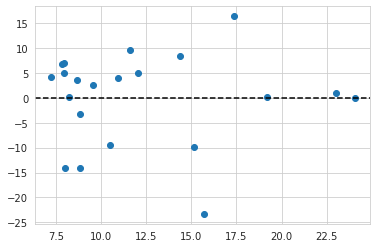

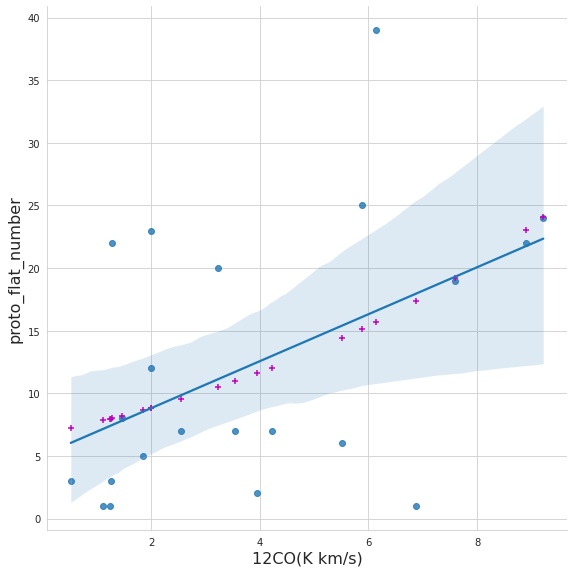

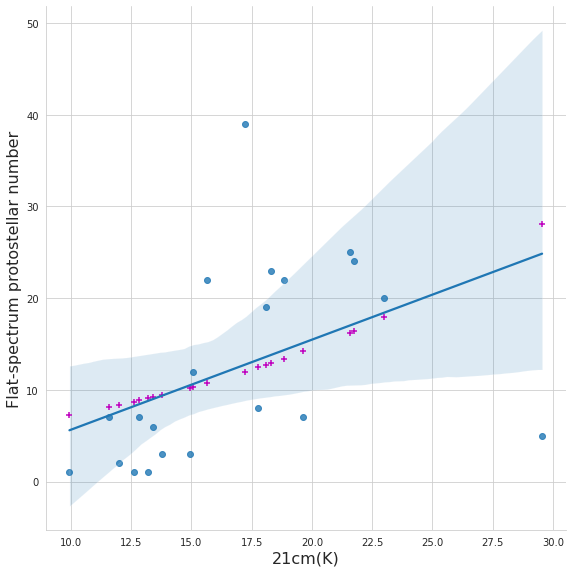

Goodness of fit for CO vs class 1 proto 
 Power_divergenceResult(statistic=134.45711577328115, pvalue=5.656382596604228e-19)


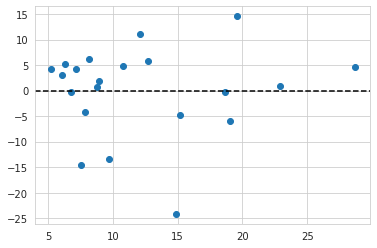

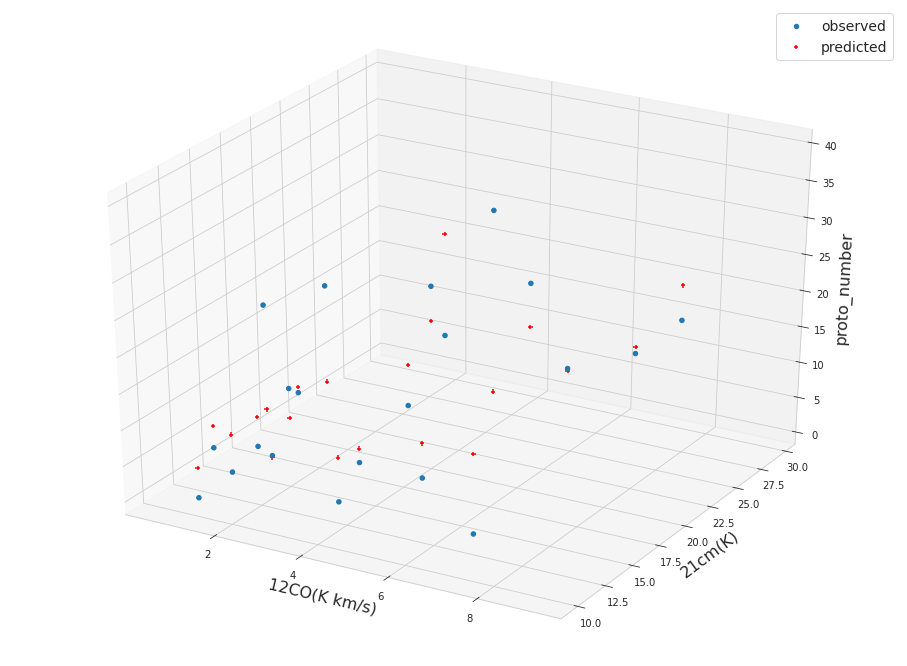

In [ ]:
from sklearn.linear_model import PoissonRegressor
features = ['12CO(K km/s)',	'21cm(K)']
target = ['proto_flat_number']
proto_co = pd.read_csv((filepath + '/data/co+21cm_flat49.csv'))
## >>>>>>>>>>>>>>>>>>>>> 12CO  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df = proto_co.dropna()
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] < proto_co_df['proto_flat_number'].max()]
X = proto_co_df['12CO(K km/s)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())

y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs flat-spectrum protostar number','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x = np.linspace(proto_co_df[['12CO(K km/s)']].min(), proto_co_df[['12CO(K km/s)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='12CO(K km/s)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("12CO(K km/s)", fontsize = 16)
plt.ylabel("proto_flat_number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>>>>> 21cm >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
X = proto_co_df['21cm(K)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())
y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))

x = np.linspace(proto_co_df[['21cm(K)']].min(), proto_co_df[['21cm(K)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='21cm(K)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("21cm(K)", fontsize = 16)
plt.ylabel("Flat-spectrum protostellar number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>   USE both 21cm and 12CO >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
X = proto_co_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 

pr.fit(X,  np.array(y).flatten())

y_pred = pr.predict(X)
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs class 1 proto','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x1 = np.array(proto_co_df[features[0]])
x2 = np.array(proto_co_df[features[1]])

#####################################################################
from matplotlib import cm
X1 = np.array(proto_co_df[features[0]])
X2 = np.array(proto_co_df[features[1]])
y = np.array(proto_co_df[target])

fig = plt.figure(figsize=(16,12))
## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, cmap=cm.hot, alpha=1, label='observed')
ax.scatter(X1, X2, y_pred, color='r', marker='+',alpha=1, label='predicted')
## Add labels
ax.set_xlabel("12CO(K km/s)", fontsize=16)
ax.set_ylabel("21cm(K)", fontsize=16)
ax.set_zlabel("proto_number", fontsize=16)

plt.legend(fontsize=14)
#plt.savefig(filepath + '/output/co_21cm_of.pdf')
plt.show()
plt.close()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  "X does not have valid feature names, but"


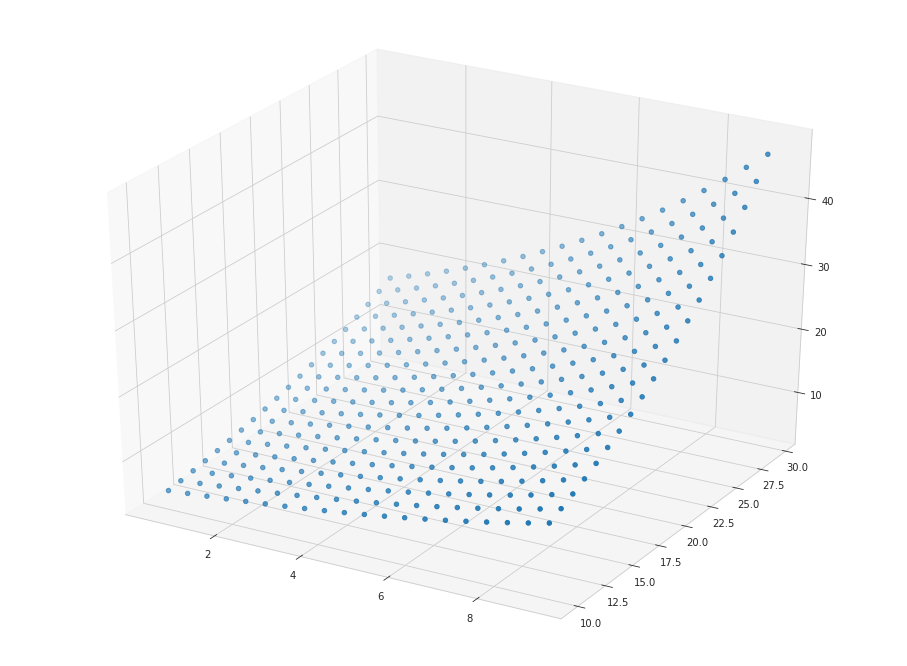

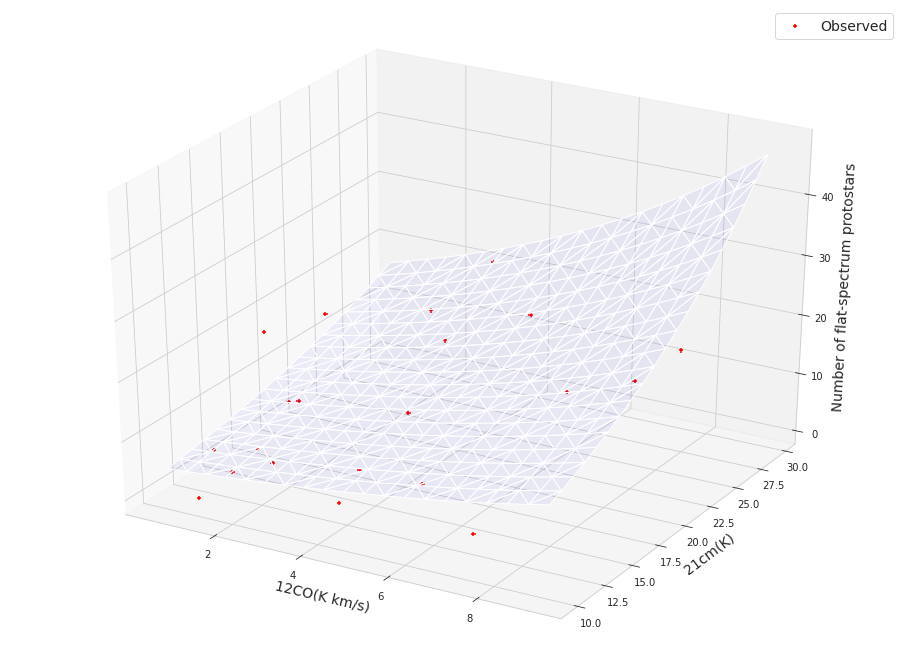

In [ ]:

x1 = np.linspace(X1.min(), X1.max(), 20)
x2 = np.linspace(X2.min(), X2.max(), 20)

y = np.array(proto_co_df[target])
z = y_pred.reshape(-1,)
x1_, x2_= np.meshgrid(x1, x2)
#y_pred = pr.predict(x1_, x2_)
X_grid = np.concatenate([x1_.reshape(-1,1), x2_.reshape(-1,1)], axis=1)
pred_grid = pr.predict(X_grid)
Xz_grid = np.concatenate([X_grid, pred_grid.reshape(-1,1)], axis=1)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xz_grid[:,0], Xz_grid[:,1], Xz_grid[:,2])
plt.savefig(filepath + '/output/flat_3dscatter.pdf', format='pdf', dp=100, overwrite=True)
plt.show()
plt.close()
#%matplotlib notebook
## Now we plot the regression plane
## along with the training observations

## Make a figure object
fig = plt.figure(figsize=(16,12))

## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')

## plot_trisurf makes a surface out of triangles
## alpha <1 allows us to see through the surface
ax.scatter(X1, X2, y, cmap=cm.hot, alpha=1, color='r',marker='+', label='Observed')
ax.plot_trisurf(Xz_grid[:, 0], Xz_grid[:, 1], Xz_grid[:,2], color='blue', alpha=0.05)

## scatter will plot the observations from the training set
#ax.scatter(outflows_train['12co_z(k km/s)'], outflows_train['21cm_z(k)'], outflows_train['outflow_number'], c="r", alpha=1)

## Add labels
ax.set_xlabel("12CO(K km/s)", fontsize=14)
ax.set_ylabel("21cm(K)", fontsize=14)
ax.set_zlabel("Number of flat-spectrum protostars", fontsize=14)

plt.legend(fontsize=14)
plt.savefig(filepath + '/output/flat_spectrum_surface.pdf', format='pdf', dp=100, overwrite=True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure(figsize=(20,18))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
#X, Y, Z = axes3d.get_test_data(0.1)
#ax.grid(False)
#ax.set_axis_off()

def init():
    ax.scatter(X1, X2, y, cmap=cm.hot, alpha=1, color='r',marker='+', label='Observed')
    ax.plot_trisurf(Xz_grid[:, 0], Xz_grid[:, 1], Xz_grid[:,2], color='blue', alpha=0.1)
    ## Add labels
    ax.set_xlabel("12CO(K km/s)", fontsize=14)
    ax.set_ylabel("21cm(K)", fontsize=14)
    ax.set_zlabel("Number of flat-spectrum protostars", fontsize=14)
    plt.legend(fontsize=14)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)    

HTML(ani.to_html5_video())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = plt.figure()
z_grid = np.array(pred_grid).reshape(20,20)
ax = plt.contour(x1_, x2_, z_grid)
plt.savefig('contour.pdf', format='pdf')
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [ ]:
L = (( cloud[2].shape[0] * 2**(0.5) * (cdelt[0] * u.deg)).to(u.rad)/(1*u.rad)).to(u.dimensionless_unscaled).value * cygX_init[0]['Distance']

<Quantity 0.00053479 kpc>

In [3]:
#############################################################################################################################################################################################################
################################################                                               ###################################################################################################
################################################  POWER IN CLOUD TURBULENCE ENERGY          ################################################
################################################                                           ################################################
#############################################################################################################################################################
#############################################################################################################################################################################################################
# CODE DEVELOPMENT: CLOUD MASS CALCULATION 
# 1. create a subcube around the center RA, Dec of a outflow with a fixed size spatial pixels and 
# [min blue velocity, max red velocity]
# 2. produce a contour showing the outflow and a circle showing the cloud of size ~ 5*beamsize ~ 75"
# 3. calculate energy of a smaller subcube representing the cloud and vaxis range in mu +/- 2*sigma.
# Mu and sigma are estimated as before, using line center and miinized energy 
from astropy.wcs import utils
from astropy import units as u
import warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import Circle
import sys 
import os
sys.path.append(filepath + '/data')
from cygFn import f, length, Jnu, G, Quad
################################################################################################################    

# Read data

#cube = SpectralCube.read('field13.fits') # <<<<<<---------- Change filename ******
#cygX0 = SpectralCube.read('cygx_cobig_small.fits')
cube = cygX0.with_spectral_unit(u.km/u.s)

cygX_init = outflowsF # QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###
#cygX_init = QTable.read('nf_input_test.fit') 

warnings.filterwarnings('ignore', category=UserWarning, append=True)


## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Outflow_Lum_mech','Cloud_Mass','Cloud_En_turb','Cloud_Lum_turb'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(0, len(cygX_init)):
    s1 = (cygX_init['RAJ2000'][z] > (cube.world_extrema[0])[0]) & (cygX_init['RAJ2000'][z] < (cube.world_extrema[0])[1])
    s2 = (cygX_init['DecJ2000'][z] > (cube.world_extrema[1])[0]) & (cygX_init['DecJ2000'][z] < (cube.world_extrema[1])[1])
    # imposing this condition to make sure the codes do not attmpt to compute values 
    #for coordinats ouside of sub field range
    if (s1 and s2) == True: # selected outflow coordinates fall in the range of fieldN.fits under consideration 
        print("coordinates in range for outflow no.",z) #perform the task 
    

        #RA = (ra_b.value+ra_r.value)/2
        #Dec = (dec_b.value+dec_r.value)/2
        RA = cygX_init[z]['RAJ2000'].value 
        Dec = cygX_init[z]['DecJ2000'].value
    
        distance = (cygX_init[z]['Distance']).to(u.pc).value

        ##### Spectral boundary includes 15 km/s on each side of the vel range 
        dv = (cube.spectral_axis[1]-cube.spectral_axis[0]).value
        vlo =-25*u.km/u.s
        vhi = 25*u.km/u.s

        box = 15

        x0, y0, _ = cube.wcs.wcs_world2pix(RA, Dec, 0, 0)
        print('checkpoint0',z+1)
        #print(x0)
        #print(y0)
        slab = cube.spectral_slab(vlo, vhi) 
        subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]
         
        #############################################################################################
        #########################    Cloud energy calc.    ##########################################
        #############################################################################################
        
        # create a new subcube for Cloud of the size of the circle and vbmin, vrmax
        
        # pixel size in deg 
        
        ang_width = 1 * 14.6 * u.arcsec
        cdelt = utils.proj_plane_pixel_scales(cube.wcs)
        width = (ang_width*0.5 / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value
        
        # 4 beamsize in pix 
        boxC = ((8 * cdelt[0]*u.deg)/(cdelt[0]*u.deg)).to(u.dimensionless_unscaled).value
        slabC = cube.spectral_slab(vlo, vhi) 
        cloud = slabC[:, int(y0-boxC):int(y0+boxC), int(x0-boxC):int(x0+boxC)]

        cloudshape = cloud[0].shape

        vaxis=cloud.spectral_axis.value
        
        v0array = np.zeros(cloudshape)
        sig0array = np.zeros(cloudshape)
        amparray= np.zeros(cloudshape)

        # Now calculate the opacitypoptblue, pcov = optimize.curve_fit(Quad, vaxis[EndFitBlue:StartFitBlue],(blue12 / blue13)[EndFitBlue:StartFitBlue],p0 = (c0, v0, c2),maxfev = 1000000)
        Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
        nu = 330.588 * u.GHz
        Tbg = 2.73 * u.K
        Aul = 6.038e-7 / u.s
        B0 = 54891.42 * u.MHz
        E3 = 30 * u.K
        Tex = ((con.h * nu / con.k_B)
                / np.log(1 + con.h * nu
                        / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
        Tex = Tex.to(u.K)

        co13cloud = np.zeros_like(cloud)

        DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
        DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

        log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
        co13cloud=10**log_co13cloud

        tau13dnu = co13cloud * DeltaV 

        N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
                    /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
                    )
        Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                             / (3 * con.k_B * Tex))
        # Calculate column density of material
        N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot
        # Assume a column density ratio
        NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

        apix = np.prod(
            np.abs(np.array([width, 1]) 
                    * (subcube.wcs.celestial.wcs.get_cdelt())
                / 180 * np.pi * distance)) * u.pc**2
        Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
        print('Mass dimensions:',Mass.shape)

      
        # 2. estimate sigma12 and vcenter --------------->>>>>>>>>>>>>>>>>>  
   
        #### sigma calculation 
        cloudshape = cloud[0].shape # spatial shape
        Tpeak=np.ones(cloudshape)
        vpeak=np.ones(cloudshape)
        sigma=np.ones(cloudshape)
        vaxis=cloud.spectral_axis.value
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec=cloud[:,i,j].value # removes unit=K
                Tpeak[i,j]=np.nanmax(spec)
                #print('Tpeak=',Tpeak[i,j])
                #print('sigma for this pixel before check',sigma[i,j])
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    print('NaN pixel')
                    #print('Tpeak=',Tpeak[i,j])
                    #rint('spec:',spec)
                    #sigma[i,j] = np.nanmean(sigma[:i,j])
                    #vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    pass
                else:
                    #print('non NaN pixel')         
                
                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    hf=Tpeak[i,j]/2

                    vraw=vaxis[spec>=hf] # vraw may be completely to the left or right on vpeak value, ideally on both sides

                    vp=vraw[vraw>=vpeak[i,j]]

                    vn=vraw[vraw<=vpeak[i,j]]

                    vp_max=np.max(vp)
                    vn_max=np.min(vn)
                    if np.abs(vp_max-vpeak[i,j]) == 0:  # This condition makes sure sigma is not zero
                        HWHM = np.abs(vn_max-vpeak[i,j])
                    elif np.abs(vn_max-vpeak[i,j]) == 0:
                        HWHM = np.abs(vp_max-vpeak[i,j])
                    else:
                        HWHM=np.minimum(np.abs(vp_max-vpeak[i,j]),np.abs(vn_max-vpeak[i,j]))
                    sigma[i,j]=HWHM/((2*np.log(2))**0.5)
                #print('sigma for this pixel after check', sigma[i,j])
                #print('--------------------------------------')

        #print('checkpoint: sigma \n', sigma)
        #############  line center estimation: MINIMIZATION OF ENERGY ######################
        #### energy of the entire spectrum under the spectrum profile for each pixel wrt Tpeak velocity
        #### This finds the line center at which E=min for each position
        
       
        N=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
        Energy = np.zeros(N)
        
        # this number must be less than spectral pixel number
        vcen = np.zeros(shape=(N, cloudshape[0],cloudshape[1])) 
        vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                l = vpeak[i,j]-5*sigma[i,j] # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
                u = vpeak[i,j]+5*sigma[i,j]
                vcen[:,i,j] = np.linspace(l,u,N) # half of spectral pixels     

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('nan-pixel encountered in line center calc')
                    vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    vcentr[i,j] = np.nanmean(vcentr[:i,j])
                else:
                    #print('non nan pixel')  

                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    for k in range(N):
                        voff = vaxis-vcen[k,i,j]#*u.km**2/u.s**2
                        Energy[k] = (np.nansum(Mass[:,i,j].value*voff**2))#.to(u.erg)#SUM OVER 1445 VEL VALUES  <<<<<<<<<<<<<<<<<<< CHECK THIS WHY SUM OVER K AND THE 2 LINES BELOW
                        voff_argmin = voff[np.nanargmin(Energy)]
                        vcentr[i,j] = vcen[:,i,j][np.nanargmin(Energy)]#*u.km/u.s#finds vcen_value(among 1e3 vcen values)at which E=min <<<< SHOULD THIS BE OUT OF K LOOP??

        #print('checkpoint:Vcenter \n',vcentr)
        #print('-----------------------')
        # calculate energy 
        
        from astropy import units as u
        massvecC = np.zeros(cloudshape) * u.solMass
        energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
        turbLum = np.zeros(cloudshape) * u.solLum

        #lumC = np.zeros(cloudshape)
        L = (( cloud[z].shape[0] * (cdelt[0] * u.deg)).to(u.rad)/(1*u.rad)).to(u.dimensionless_unscaled).value * cygX_init[z]['Distance']           #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('NaN pixel')
                    
                    massvecC[i,j] = 0
                    energyC[i,j] = 0
                else:                   
                    voff = (vcentr[i,j]-vaxis)*u.km/u.s
                    idxC = (vaxis > vcentr[i,j] - 3*sigma[i,j]) & (vaxis < vcentr[i,j] + 3*sigma[i,j])
                    massvecC[i,j] = np.nansum(Mass[idxC, i,j])
                    energyC[i,j] = 0.5 * np.nansum(Mass[idxC, i,j] * voff[idxC]**2)
                    turbLum[i,j] = (np.nansum(Mass[idxC, i,j] * np.abs(voff[idxC])**3)/L).to(u.solLum)
        
                #print('checkpoint:Energy per pixel',energyC[i,j] )
            #print('------------------')
        
        mass_cloud = massvecC.sum()
        energy_cloud = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
        lum_cloud = turbLum.sum()#.to(u.solLum)

        
        print('Cloud mass', mass_cloud)
        print('Cloud energy',energy_cloud,'1e44*u.erg')
        t.add_row([z+1,cygX_init[z]['ID'], round(RA,4), round(Dec,4), cygX_init[z]['L_mech'],round(mass_cloud.value,3), 
                   round(energy_cloud.value,3),  round(lum_cloud.value,3)])
    else:
        pass
    
t['RAJ2000'].unit = u.deg
t['DecJ2000'].unit = u.deg
t['Outflow_Lum_mech'].unit = u.solLum 
t['Cloud_Mass'].unit = u.solMass
t['Cloud_En_turb'].unit = 1e44*u.erg
t['Cloud_Lum_turb'].unit = 1*u.solLum
t.write(filepath + '/data/outflowsClouds_Energy_turb1.fit',overwrite=True) # <<<<<<---------- Change filename ******
t



coordinates in range for outflow no. 0
checkpoint0 1
Mass dimensions: (119, 16, 16)
Cloud mass 9.7272138139233 solMass
Cloud energy 6.01544310583141 1e44*u.erg
coordinates in range for outflow no. 1
checkpoint0 2
Mass dimensions: (119, 16, 16)
Cloud mass 3.3191740532929543 solMass
Cloud energy 1.3508564929106612 1e44*u.erg
coordinates in range for outflow no. 2
checkpoint0 3
Mass dimensions: (119, 16, 16)
Cloud mass 45.637798300012946 solMass
Cloud energy 4.106744635096629 1e44*u.erg
coordinates in range for outflow no. 3
checkpoint0 4
Mass dimensions: (119, 16, 16)
Cloud mass 27.96267083287239 solMass
Cloud energy 4.786591456743266 1e44*u.erg
coordinates in range for outflow no. 4
checkpoint0 5
Mass dimensions: (119, 16, 16)
Cloud mass 6.398707702290267 solMass
Cloud energy 1.1692207855419432 1e44*u.erg
coordinates in range for outflow no. 5
checkpoint0 6
Mass dimensions: (119, 16, 16)
Cloud mass 736.6237125557091 solMass
Cloud energy 70.6417428769375 1e44*u.erg
coordinates in range f

Seq,ID,RAJ2000,DecJ2000,Outflow_Lum_mech,Cloud_Mass,Cloud_En_turb,Cloud_Lum_turb
,,deg,deg,solLum,solMass,1e+44 erg,solLum
int64,str13,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.127,42.072,0.013906206842583714,9.727,6.015,0.131
2,G79.962+2.556,306.1963,42.1371,0.0032008298787727265,3.319,1.351,0.024
3,G80.149+2.710,306.1539,42.3759,0.0033392727391642375,45.638,4.107,0.043
4,G80.158+2.727,306.144,42.3941,0.008323139338502325,27.963,4.787,0.06
5,G80.815+0.661,308.9185,41.709,0.00038065386345587164,6.399,1.169,0.008
6,G80.832+0.570,309.0343,41.6708,0.014107875369897034,736.624,70.642,0.251
7,G80.862+0.385,309.2542,41.5805,0.10512088772523114,464.942,71.43,0.293
8,G80.916+0.331,309.3555,41.594,0.005334894457534882,67.035,21.022,0.172


average power ratio =  -1.0093284947912529


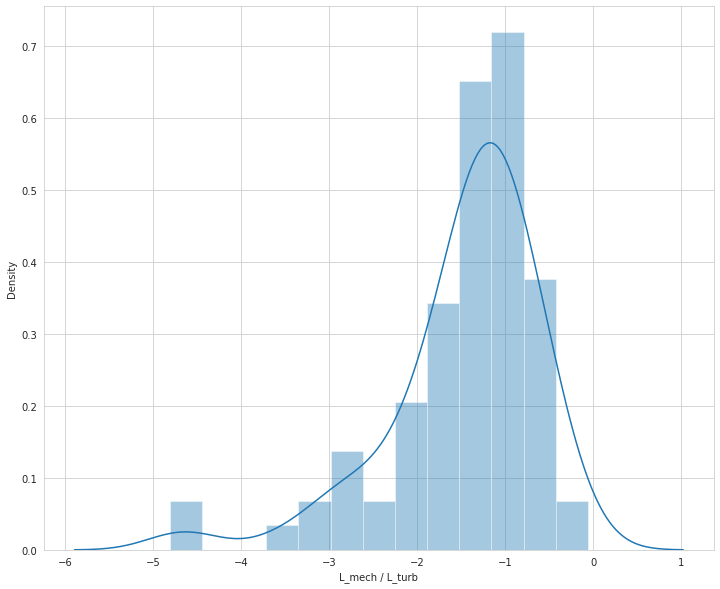

In [6]:
clouds_turb = QTable.read(filepath + '/data/outflowsClouds_Energy_turb1.fit')
clouds_turb
clouds_turb_ =  clouds_turb.to_pandas().dropna()
clouds_turb_['power_ratio'] = clouds_turb_['Outflow_Lum_mech']/(clouds_turb_['Cloud_Lum_turb']*1)
clouds_turb_ = clouds_turb_[clouds_turb_['power_ratio']>0]
print('average power ratio = ', np.log10(np.nanmean(clouds_turb_['power_ratio'])))

plt.figure(figsize=(12,10))
sns.distplot(np.log10(clouds_turb_['power_ratio']),axlabel='L_mech / L_turb')

In [ ]:
cloud[z].shape[0]/2*np.sqrt(2)

11.313708498984761